<h1>Practical Data Science Project 2</h1>
<h3>Done by Lionel Ng & Zuo Lin</h3>
<br>
<p>The goal of our project is to use the historical prices of S&P companies under the New York Stock Exchange to identify undervalued stocks using prediction machine learning algorithms such as regression and LSTM (best algorithm to be determined after exploration). This task is heavily related to the finance domain, which the both of us are highly interested in. We wish to harness the power of machine learning to bring value to financial institutions and investors by building a model that is highly effective in identifying any potential stocks to invest in. The T P E for our project is:</p>

T  To identify undervalued stocks with high investment potential
<br>
P Overall investment gains when compared to real time data
<br>
E Using fundamentals about the firms such as Net Cash Flow, Liabilities, Long term debt & etc as well as historical prices
    
<b>Our approach:</b>
<br>
We decided to adopt the following methodology to our problem:
<br>
Research -> EDA -> Building baseline models -> Improving the models -> Re-evaluating our results -> Summarise key findings

<b>Key results found:</b>
<br>
Some models were effective in helping to predict the general price movement
<br>
Cost of mistake is high in investing, high accuracy may not be a fool-proof plan for investors
<br>
Project identify possible flaws in trusting algorithms in its entirety, human analysis and hedging continue to be <br>
important steps in preventing losses in your investment portfolios

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import os

np.warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/prices-split-adjusted.csv')
df2 = pd.read_csv('data/securities.csv')
df3 = pd.read_csv('data/fundamentals.csv')

In [3]:
df.groupby(['symbol']).count()

,date,open,close,low,high,volume
symbol,,,,,,
A,1762,1762,1762,1762,1762,1762
AAL,1762,1762,1762,1762,1762,1762
AAP,1762,1762,1762,1762,1762,1762
AAPL,1762,1762,1762,1762,1762,1762
ABBV,1008,1008,1008,1008,1008,1008
...,...,...,...,...,...,...
YHOO,1762,1762,1762,1762,1762,1762
YUM,1762,1762,1762,1762,1762,1762
ZBH,1762,1762,1762,1762,1762,1762


<h2>Data Exploration</h2>
<br>
We first started the project by doing some exploratory data analysis. Since our data has already been pre-processed into numerical variables with NA and empty fields removed, we did not have to do much pre-processing for the dataset


In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


The first dataframe (df) indicates the daily prices.

In [5]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [6]:
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])


number of different stocks:  501
['SNI', 'CRM', 'UNP', 'GS', 'L', 'UHS', 'COG', 'ESRX', 'MCD', 'ILMN']


Based on the summary statistics, there are more than 800,000 rows of data available in the dataset, however, they are seperated to 501 stocks symbol hence the number of data was not as vast as we expected

In [7]:
df2.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


Df2 shows general description of each company with division on sectors, we believe some of the variables such as sector data could be potential features to be added based on our understanding that some industries tend to do better on the stock market

In [8]:
df3.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


Df3 are metrics extracted from annual SEC 10K fillings (2012-2016), based on research some of the variables provided are used as popular fundamental indicators for stock price analysis.

In [9]:
data = df
NA_col = data.isnull().sum()
print(NA_col)

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


In [10]:
data2 = df2
NA_col = data2.isnull().sum()
print(NA_col)

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64


In [11]:
data3 = df3
NA_col = data3.isnull().sum()
print(NA_col)

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64


From the 3 results, we can conclude that the amount of null results in all 3 datasets are negligible.

In [12]:
corr = df.corr()
print(corr)

            open     close       low      high    volume
open    1.000000  0.999845  0.999914  0.999928 -0.132526
close   0.999845  1.000000  0.999926  0.999925 -0.132675
low     0.999914  0.999926  1.000000  0.999889 -0.133087
high    0.999928  0.999925  0.999889  1.000000 -0.132168
volume -0.132526 -0.132675 -0.133087 -0.132168  1.000000


In [13]:
df = data.loc[data['symbol']=='AAPL']
df.drop('symbol', axis=1, inplace=True)
print(np.shape(df))

(1762, 6)


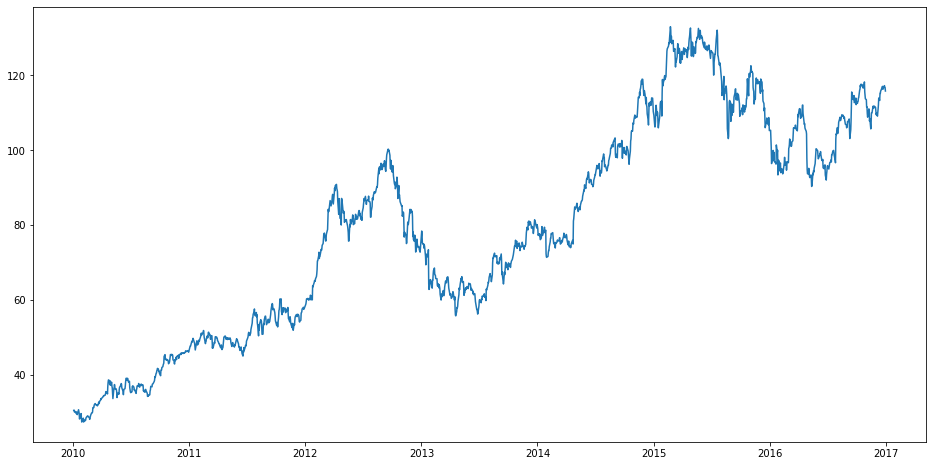

In [14]:
# changing the index to date

#setting index as date
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

#plot
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

We observed the general trend of the Apple stocks' performance from 2010 to end 2016. The general trend is an upward trend

In [15]:
Min_date = df.index.min()
Max_date = df.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 2010-01-04 00:00:00
Last date is 2016-12-30 00:00:00
2552 days 00:00:00


<h2>Initial baseline model exploration</h2>
<br>
After our initial exploratory data analysis, we decided to explore the various algorithms we have found through our research to see the effectiveness of each baseline models. The models that we have tried are linear regression, moving average, logistic regression, ARIMA, autoregression & genetic algorithm

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [17]:
# Creating new column 
num = 30 # forcasting 30 days ahead
df['label'] = df['close'].shift(-num) # forcasting close column
                                     
print(df.shape)

(1762, 6)


In [18]:
Data = df.drop(['label'],axis=1)
X = Data.values
X = preprocessing.scale(X)
X = X[:-num]

df.dropna(inplace=True)
Target = df.label
y = Target.values

print(np.shape(X), np.shape(y))

(1732, 5) (1732,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test , y_test) #Returns the coefficient of determination R^2 of the prediction

0.9347601604086523

In [21]:
# Prediction 

X_Predict = X[-num:]
Forecast = lr.predict(X_Predict)
print(Forecast)

[113.41475514 113.56114704 115.94140457 115.89398351 116.22142036
 116.39046268 116.32937955 116.6693133  116.35674043 119.10110803
 116.21461339 115.427429   116.43960967 116.35725093 114.63094245
 114.41649234 113.71422431 113.07445997 112.94549004 111.39911671
 110.75120187 109.98617289 109.9528531  111.90465852 111.56550867
 111.19965166 109.45588109 107.93534667 107.61088578 111.22761473]


### Plotting the results

In [22]:
Date = np.array(df.index) 
last_Date = Date[len(Date)-1]
print(last_Date)

2016-11-16T00:00:00.000000000


In [23]:
# creating timeserie from the last date

trange = pd.date_range('2016-10-15', periods=num, freq='d')
trange

DatetimeIndex(['2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18',
               '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22',
               '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30',
               '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
               '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11',
               '2016-11-12', '2016-11-13'],
              dtype='datetime64[ns]', freq='D')

In [24]:
# Adding the predicted values to dateframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['forecast']
Predict_df

,forecast
2016-10-15,113.414755
2016-10-16,113.561147
2016-10-17,115.941405
2016-10-18,115.893984
2016-10-19,116.221420
2016-10-20,116.390463
2016-10-21,116.329380
2016-10-22,116.669313
2016-10-23,116.356740
2016-10-24,119.101108


In [25]:
preds = lr.predict(X_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rmse

7.085462122932262

In [26]:
#plot
df['date'] = df.index
df['date'] = pd.to_datetime(df['date'])
mask = (df['date'] > '2016-10')
updated_df = df.loc[mask]
updated_df

,open,close,low,high,volume,label,date
date,,,,,,,
2016-10-03,112.709999,112.519997,112.279999,113.050003,21701800.0,105.709999,2016-10-03
2016-10-04,113.059998,113.000000,112.629997,114.309998,29736800.0,107.110001,2016-10-04
2016-10-05,113.400002,113.050003,112.690002,113.660004,21453100.0,109.989998,2016-10-05
2016-10-06,113.699997,113.889999,113.129997,114.339996,28779300.0,109.949997,2016-10-06
2016-10-07,114.309998,114.059998,113.510002,114.559998,24358400.0,110.059998,2016-10-07
2016-10-10,115.019997,116.050003,114.720001,116.750000,36236000.0,111.730003,2016-10-10
2016-10-11,117.699997,116.300003,116.199997,118.690002,64041000.0,111.800003,2016-10-11
2016-10-12,117.349998,117.339996,116.750000,117.980003,37586800.0,111.230003,2016-10-12
2016-10-13,116.790001,116.980003,115.720001,117.440002,35192400.0,111.790001,2016-10-13


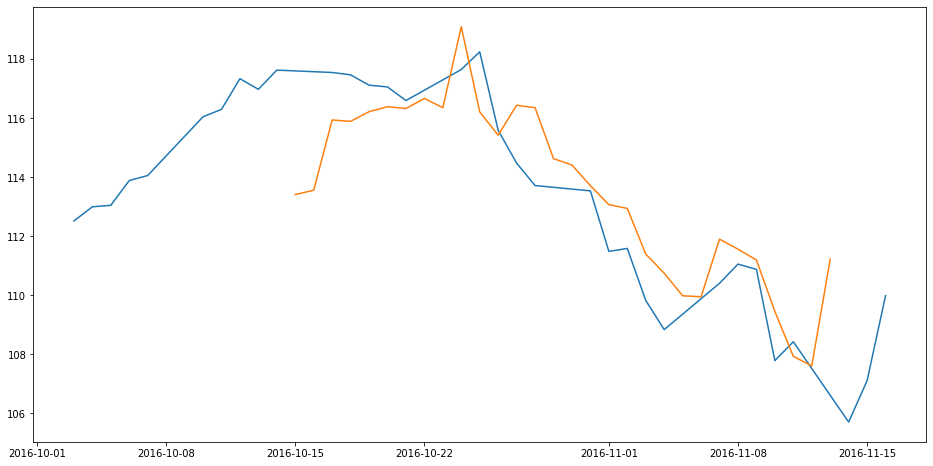

In [27]:
plt.figure(figsize=(16,8))
plt.plot(updated_df['close'], label='Close Price history')
plt.plot(Predict_df['forecast'], label='Close Price History')

Based on this graph, we have observed that the linear regression model was able to predict the general trend from mid Oct 2016 to early Nov 2016. however the last part of the predicted result in orange showed a drastic increase while there was a dip in the actual data.

### Moving Average

In [28]:
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [29]:
def get_preds_mov_avg(df, target_col, N, pred_min, offset):
    prediction_list = df[target_col].rolling(window = N, min_periods=1).mean()
    prediction_list = np.concatenate((np.array([np.nan]), np.array(prediction_list[:-1])))
    prediction_list = np.array(prediction_list)
    prediction_list[prediction_list < pred_min] = pred_min
    
    return prediction_list[offset:]

In [30]:
test_size = 0.3
cv_size = 0.2                   
Nmax = 20                       
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]

In [31]:
import math

RMSE = []
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_mov_avg(train_cv, 'close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['close'])))
print('RMSE = ' + str(RMSE))

RMSE = [1.136088279189026, 1.2839546832595412, 1.4554431352314419, 1.6231430114298284, 1.7827735125206432, 1.92100770378328, 2.040315560616955, 2.1485949348357147, 2.241591247173668, 2.3229061018343, 2.39712015136277, 2.4633364338484527, 2.5248889923917646, 2.5826417727925532, 2.6367962859935625, 2.69123504921246, 2.748888399331664, 2.80951021622602, 2.8711482209572567, 2.9342003326276815]


In [32]:
est_list = get_preds_mov_avg(df, 'close', 2, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + '2'] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['close'])))
test.head()

RMSE = 1.985


,open,close,low,high,volume,label,date,est_N2
date,,,,,,,,
2014-10-28,105.400002,106.739998,105.349998,106.739998,48060900.0,111.949997,2014-10-28,105.165001
2014-10-29,106.650002,107.339996,106.360001,107.370003,52687900.0,111.620003,2014-10-29,105.925000
2014-10-30,106.959999,106.980003,105.900002,107.349998,40654800.0,109.730003,2014-10-30,107.039997
2014-10-31,108.010002,108.000000,107.209999,108.040001,44639300.0,108.230003,2014-10-31,107.160000
2014-11-03,108.220001,109.400002,108.010002,110.300003,52282600.0,106.750000,2014-11-03,107.490002


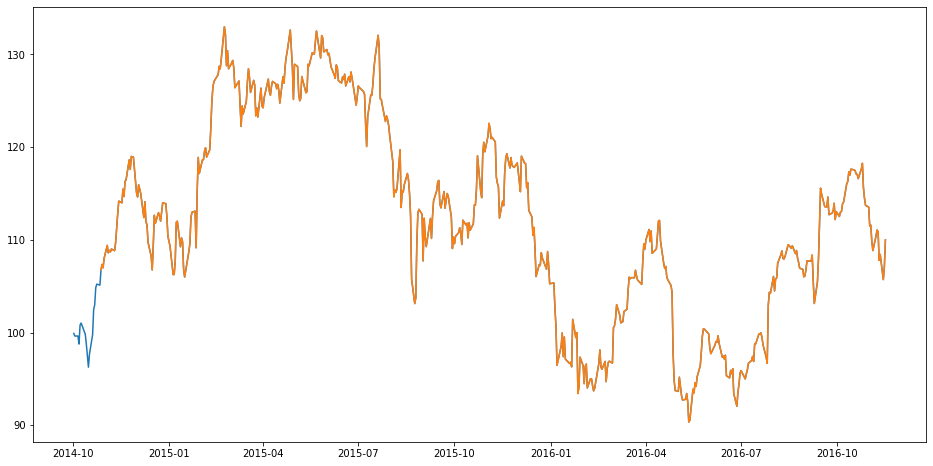

In [33]:
mask = (df['date'] > '2014-10')
updated_df2 = df.loc[mask]
plt.figure(figsize=(16,8))
plt.plot(updated_df2['close'], label='Close Price history')
plt.plot(test['close'], label='Close Price History')

Compared to the actual closing price trend we have plotted on top, the model predicted the opposite trend from the actual data

# Autoregression Model
As we were dealing with time-series data, we decided to make use of the autoregression model from the statsmodel library

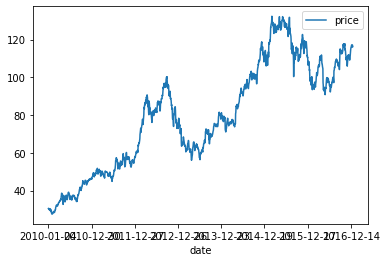

In [34]:
from parser import Parser
parser = Parser()
apple = parser.get("AAPL")
apple.plot()
split = int(apple.shape[0]*0.7)
train, test = apple.iloc[:split, :], apple.iloc[split:, :]

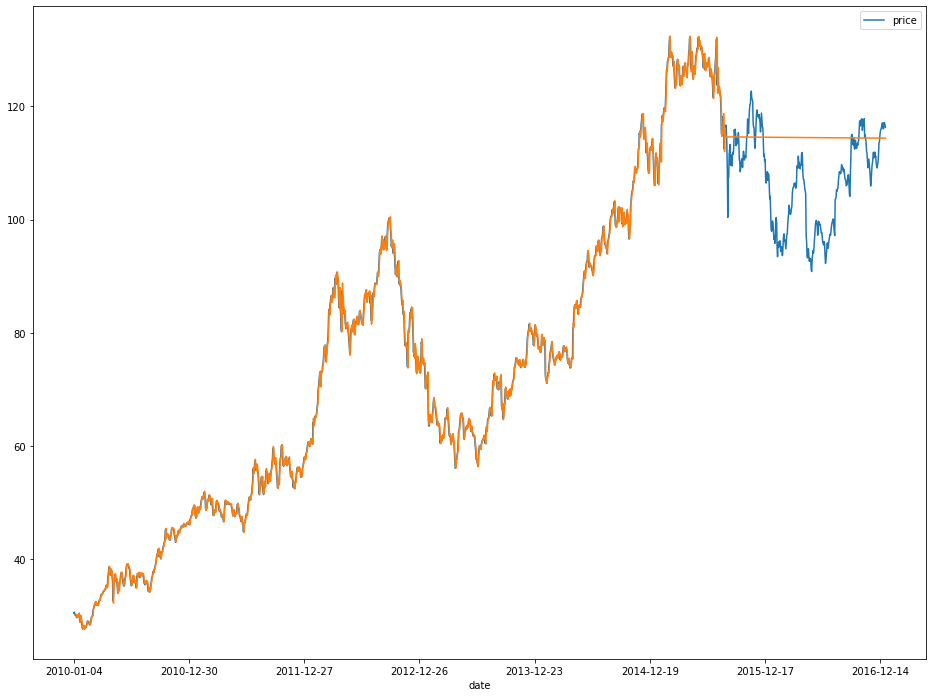

In [35]:
# !pip install statsmodels # on windows
# !pip3 install statsmodels # on mac

from statsmodels.tsa.ar_model import AutoReg

start = int(apple.shape[0]*0.8)

model = AutoReg(apple, lags=5).fit()
pred = model.predict(start=0, dynamic=start)

# pred = pd.Series([0 for i in range(start)]).append(pred)

apple.plot(figsize=(16,12))
pred.plot()

For the autoregression model, we could observe that the predicted result shows a flat line, which is way off compared to the actual trend line.

# ARIMA Model
We decided to try the ARIMA model also (another time-series prediction model) as the results from the autoregression were not fantastic

In [36]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(train, order=(1,1,1))
arima_model_fit = arima_model.fit(disp=0)

arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                 1232
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1696.760
Method:                       css-mle   S.D. of innovations              0.959
Date:                Wed, 06 May 2020   AIC                           3401.520
Time:                        20:56:19   BIC                           3421.985
Sample:                             1   HQIC                          3409.219
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0709      0.033      2.170      0.030       0.007       0.135
ar.L1.D.price    -0.0360      0.120     -0.301      0.764      -0.270       0.199
ma.L1.D.price     0.2392      0.115      2.073      0.038       0.013       0.465
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -27.8039           +0.0000j           27.8039            0.5000
MA.1           -4.1814           +0.0000j            4.1814            0.5000
-----------------------------------------------------------------------------
"""

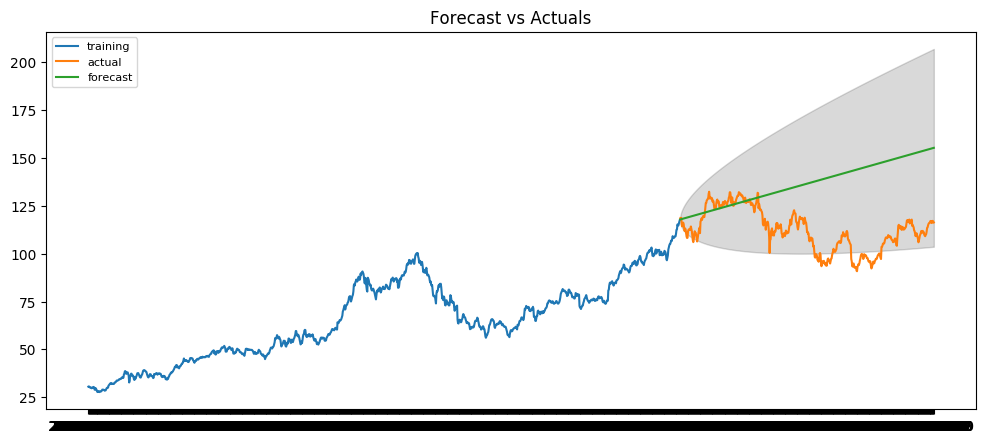

In [37]:
fc, se, conf = arima_model_fit.forecast(test.shape[0], alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Similarly, the model was not able to capture the general trend and performed way worst than linear regression

# Logistic Regression & other sklearn models
We also experimented with several models as a time series predictor.
One unconventional one that we experimented was logistic regression since our target variable is not a categorical data. To achieve this task in this model, the independent variable was the the past N price columns, while the dependent variable was a binary variable representing whether the next price after the window was higher than its previous price. 

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

WINDOW = 50

x = []
y = []
for i in range(WINDOW, len(apple.values)):
    xv = apple["price"].values[i-WINDOW:i]
    yv = apple["price"].values[i]
    x.append(xv)
    
    if yv < xv[-1]:
        y.append(0)
    else:
        y.append(1)
    
x = pd.DataFrame(x)

Scalers = [
    ("standard scaler", StandardScaler),
    ("min max scaler", MinMaxScaler),
    ("robust scaler", RobustScaler),
    ("max ab scaler", MaxAbsScaler)
]

Models = [
    ("Naive bayes", BernoulliNB),
    ("logistic regresssion", LogisticRegression),
    ("decision tree", DecisionTreeClassifier),
    ("random forest", RandomForestClassifier),
    ("support vector machine", LinearSVC)
]

for scaler_name, Scaler in Scalers:

    print("="*100)
    print("scaler used:", scaler_name)
    print("="*100)
    print()
    
    for model_name, Model in Models:

        scaler = Scaler()
        x_scaled = scaler.fit_transform(x)
        x_train, x_test, y_train, y_test = train_test_split(x_scaled,y)


        model = Model()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        print(f"{model_name} accuracy score:", accuracy_score(y_pred, y_test))
        print(f"{model_name} precision score:", precision_score(y_pred, y_test))
        print(f"{model_name} recall score:", recall_score(y_pred, y_test))
        print(f"{model_name} f1 score:", f1_score(y_pred, y_test))
        print()




scaler used: standard scaler

Naive bayes accuracy score: 0.514018691588785
Naive bayes precision score: 0.5086206896551724
Naive bayes recall score: 0.5566037735849056
Naive bayes f1 score: 0.5315315315315315

logistic regresssion accuracy score: 0.572429906542056
logistic regresssion precision score: 0.8630705394190872
logistic regresssion recall score: 0.5810055865921788
logistic regresssion f1 score: 0.6944908180300502

decision tree accuracy score: 0.5420560747663551
decision tree precision score: 0.5659574468085107
decision tree recall score: 0.5859030837004405
decision tree f1 score: 0.5757575757575758

random forest accuracy score: 0.5864485981308412
random forest precision score: 0.6348547717842323
random forest recall score: 0.6322314049586777
random forest f1 score: 0.6335403726708074

support vector machine accuracy score: 0.5841121495327103
support vector machine precision score: 0.7224489795918367
support vector machine recall score: 0.6167247386759582
support vector mach

<h2>Improving our models</h2>
<br>
After evaluating our models and data, we believe that there are a few ways we may potentially improve the performance of our models.

### Introducing more features

Based on the datasets provided on kaggle, we are given some fundamental indicators relating to each stock. We decided to combine the fundamentals dataset with the stock price datasets to introduce more features into our machine learning models

In [39]:
df = pd.read_csv('data/prices-split-adjusted.csv')
df3 = df3.rename(columns={'Ticker Symbol':'symbol', 'Period Ending':'date'})
df4 = pd.merge(df, df3, how='left', on=['date','symbol'])

### Feature engineering

We have decided to take sector information from our securities dataset to add it into our main dataset. Since sector data is categorical, we have to encode it into continuous variables

In [40]:
df2['GICS Sector'] = df2['GICS Sector'].astype('category')
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)
df2 = df2.rename(columns={'Ticker symbol':'symbol'})
#combining it to the main dataset
tempdf = df2[['symbol','GICS Sector']]
df4 = pd.merge(df4, tempdf['symbol'], how='inner', on=['symbol'])

### Normalisation

Since the data consist of features with varying scales, we decided to apply normalisation to ensure that the model is not affected by extreme values. We decided to apply min max normalization to our problem

In [41]:
from sklearn import preprocessing

x = df4.iloc[:,2:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df4_scaled = pd.DataFrame(x_scaled)
df4_scaled = pd.concat([df4.iloc[:,:2], df4_scaled], axis=1)
df4_scaled.columns = df4.columns
df4_scaled

,date,symbol,open,close,low,high,volume,Unnamed: 0,Accounts Payable,Accounts Receivable,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,2016-01-05,WLTW,0.076934,0.078812,0.078020,0.077818,0.002517,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-06,WLTW,0.078078,0.075095,0.076490,0.077374,0.002776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-07,WLTW,0.072480,0.071904,0.073254,0.073747,0.002896,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-08,WLTW,0.071911,0.072964,0.072331,0.072309,0.002334,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-11,WLTW,0.072878,0.071917,0.072712,0.072240,0.001639,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-23,FTV,0.033277,0.033567,0.033757,0.033112,0.000595,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851260,2016-12-27,FTV,0.033542,0.033535,0.033976,0.033162,0.000449,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851261,2016-12-28,FTV,0.033485,0.033085,0.033563,0.033049,0.000629,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851262,2016-12-29,FTV,0.033062,0.033250,0.033640,0.032724,0.000558,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Re-evaluating our models</h2>

In this section, we are going to re-evaluate 2 models that we have identified using the new and improved dataset. We have identified 2 models (Linear regression & Genetic Algorithm) to further improve on due to the high accuracy score (For Linear Regression) shown. We decided to explore Genetic Algorithm further as the results shown seems to show profitability from trading

### Linear regression

In [42]:
# Creating new column 
num = 30 # forcasting 30 days ahead
df4_scaled['label'] = df4_scaled['close'].shift(-num) # forcasting close column
                                     
print(df4_scaled.shape)

(851264, 85)


In [43]:
df = df4_scaled.loc[df4_scaled['symbol']=='AAPL']
df.drop('symbol', axis=1, inplace=True)
Data = df.drop(['label',"date"],axis=1)
X = Data.values
X = preprocessing.scale(X)
# X = X[:-num]

Target = df.label
y = Target.values
print(np.shape(X), np.shape(y))
X = np.nan_to_num(X)

(1762, 82) (1762,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test , y_test) #Returns the coefficient of determination R^2 of the prediction


0.8057691399719715

In [45]:
# Prediction 

X_Predict = X[-num:]
Forecast = lr.predict(X_Predict)
print(Forecast)

[0.06678726 0.06523237 0.06736561 0.06673309 0.06718524 0.06685193
 0.06603866 0.06766478 0.06708133 0.06662397 0.06595208 0.06698439
 0.06580609 0.06707861 0.06758067 0.06848445 0.06882567 0.06875399
 0.06783468 0.06827995 0.06853138 0.06926323 0.06881222 0.06865393
 0.06918428 0.06906449 0.06953738 0.07068048 0.06880246 0.06976853]


In [46]:
Date = np.array(df.index) 
last_Date = Date[len(Date)-1]
print(last_Date)

7298


In [47]:
# creating timeserie from the last date

trange = pd.date_range('2016-10-15', periods=num, freq='d')
trange

DatetimeIndex(['2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18',
               '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22',
               '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30',
               '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
               '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11',
               '2016-11-12', '2016-11-13'],
              dtype='datetime64[ns]', freq='D')

In [48]:
# Adding the predicted values to dateframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['forecast']
Predict_df

,forecast
2016-10-15,0.066787
2016-10-16,0.065232
2016-10-17,0.067366
2016-10-18,0.066733
2016-10-19,0.067185
2016-10-20,0.066852
2016-10-21,0.066039
2016-10-22,0.067665
2016-10-23,0.067081
2016-10-24,0.066624


In [49]:
preds = lr.predict(X_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rmse

0.007917507983353637

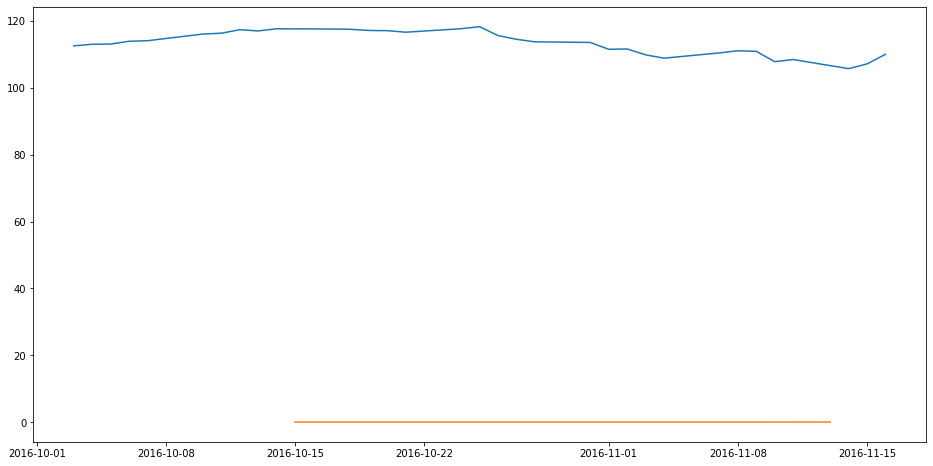

In [50]:
plt.figure(figsize=(16,8))
plt.plot(updated_df['close'], label='Close Price history')
plt.plot(Predict_df['forecast'], label='Close Price History')

We discovered that the multiple linear regression model seem to have performed worst than the baseline linear regression model. Some of the possible reasons we believed could be due to overfitting of the data as we included more features. In addition, data also became sparse due to the combination of 2 datasets. Some possible reasons to improve could be to get more data for the variables we are exploring.

# Genetic Algorithm
We decided also to explore the use of the genetic algorithm learnt in class to teach a model to learn how to trade. Here's the general idea of what we tried to do

```
1. preprocess and clean the data
2. spawn N monkeys (agents)
3. randomly initialize the array representation of the monkeys
4. get the N monkeys to trade a pool of random stocks
5. sort the monkeys based on their percentage gains
6. pick the best n monkeys 
7. spawn more children monkeys from the best n monkeys (mutation + combination)
8. repeat steps 4 to 7 for i iterations

```

In [53]:
from genetic_helper.classes.Monkey import Monkey
from genetic_helper.classes.genetic import Genetic
from parser import Parser

In [80]:
parser = Parser()
gen = Genetic(num_monkeys=50, monkey_window_size=25, num_keep=2, num_iter=20)

import random
random.seed(6)

pool = parser.get_pool(n=4)

out = gen.run_pool(pool)

chosen: ['SE', 'WDC', 'PAYX', 'MSFT']
iteration 1: stats: {'high': 98.9825843971, 'average': -16.802581843893766, 'low': -106.52281808720001} 
iteration 2: stats: {'high': 98.9825843971, 'average': 66.96499935790848, 'low': -88.885198554925} 
iteration 3: stats: {'high': 99.1344432374375, 'average': 71.89093455166496, 'low': -3.492686098125006} 
iteration 4: stats: {'high': 99.27685190143751, 'average': 53.16319800681974, 'low': 0.0} 
iteration 5: stats: {'high': 102.95403170514999, 'average': 39.28556230698249, 'low': -91.54888202776249} 
iteration 6: stats: {'high': 102.95403170514999, 'average': 44.55150021351171, 'low': -107.37795514103749} 
iteration 7: stats: {'high': 102.95403170514999, 'average': 52.91614272013398, 'low': -91.26175550966249} 
iteration 8: stats: {'high': 102.95403170514999, 'average': 37.59712293497722, 'low': -111.183516466575} 
iteration 9: stats: {'high': 102.95403170514999, 'average': 48.226678377212735, 'low': -107.99118737013751} 
iteration 10: stats: {'h

In [83]:
monkey = gen.monkeys[0]
monkey.weights

[[0.984209584472732,
  0.13326307739599874,
  0.28882665136358304,
  0.21833446785218963,
  0.14879958454800973,
  -0.5536339842308865,
  0.021692942611509114,
  0.9696215958851004,
  1.1968080222317428,
  0.1641274401313576,
  -0.4216368260960676,
  0.43837872918792703,
  0.6941103641661699,
  0.38783133606651266,
  1.290392616782632,
  0.9896578546605123,
  0.3172850775008966,
  0.8709074657437441,
  0.6069435676824189,
  0.18171929566987344,
  0.03694132733160593,
  1.3924070602934524,
  1.1104767305851053,
  -0.26877422995723177,
  0.5030065974685844,
  0.7865466318153205],
 [0.6151960774485615,
  1.0653141490696325,
  0.49979496645828847,
  1.0777885462477812,
  0.4706313085422352,
  1.2218800701793329,
  0.6713701210821459,
  1.086035132660713,
  0.9485313010149792,
  0.9329295456166706,
  -0.21677565255937253,
  0.23248079862331417,
  0.1400918912512748,
  0.270916550861585,
  0.6406347068342111,
  0.5401203277937483,
  -0.336248522438275,
  -0.44496964509176373,
  0.51147748357

In [85]:
apple = parser.get("AAPL")

# this shows the returns the best monkey has from trading apple stock
monkey.trade(apple)

201.18897820022949

In [89]:
pool = parser.get_pool(n=20)
pool = {k:monkey.trade(df) for k,df in pool.items()}
# this shows the returns that the best monkey has made from trading the list of stocks stated below
pool

chosen: ['IR', 'EA', 'ALL', 'KIM', 'KR', 'NOC', 'YUM', 'COO', 'USB', 'TRIP', 'VRSK', 'ESS', 'SLB', 'HIG', 'NVDA', 'NWL', 'TAP', 'KMB', 'CELG', 'MLM']


{'IR': 156.06035755456332,
 'EA': 306.7452791589,
 'ALL': 118.30296608955004,
 'KIM': 66.40100332005001,
 'KR': 253.80626227462506,
 'NOC': 186.21670649999996,
 'YUM': 106.41683784773132,
 'COO': 348.2694805029,
 'USB': 96.18227999999998,
 'TRIP': -10.755550089599996,
 'VRSK': 138.50992660890003,
 'ESS': 138.24984112240003,
 'SLB': 3.5912812320000027,
 'HIG': 68.80767400000002,
 'NVDA': 790.3271185799498,
 'NWL': 164.73225294375,
 'TAP': 111.80322541129999,
 'KMB': 13.096950327312294,
 'CELG': 254.59183295399998,
 'MLM': 144.3233118227}

### Concluding statement

After exploring the 2 models we have identified in greater depths, we believe that the models would defintely be of value to investors to identify the general trends in stocks price movement. However, even in model with high accuracy, a single mistake made by the various models could prove as a costly mistake to investors. Hence, investors should continue to exercise careful judgement while evaluating which stocks to invest in.

This project also identify the potential drawbacks from the latest trending way of investing, robo-advisory platforms. Algorithms can fail us at some point and hence it is still important for the human touch and analysis investing to hedge against any potential fall in your investment portfolio.